In [35]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("winequality-red.csv",sep=";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score

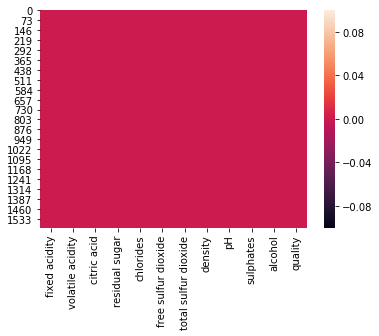

In [7]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x22ef627ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x22ef98eff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ef98ef6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x22ef99027f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ef9902b38>],
 'means': []}

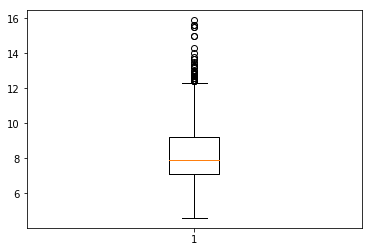

In [8]:
plt.boxplot(df["fixed acidity"])

In [9]:
dfcorr=df.corr()

In [10]:
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


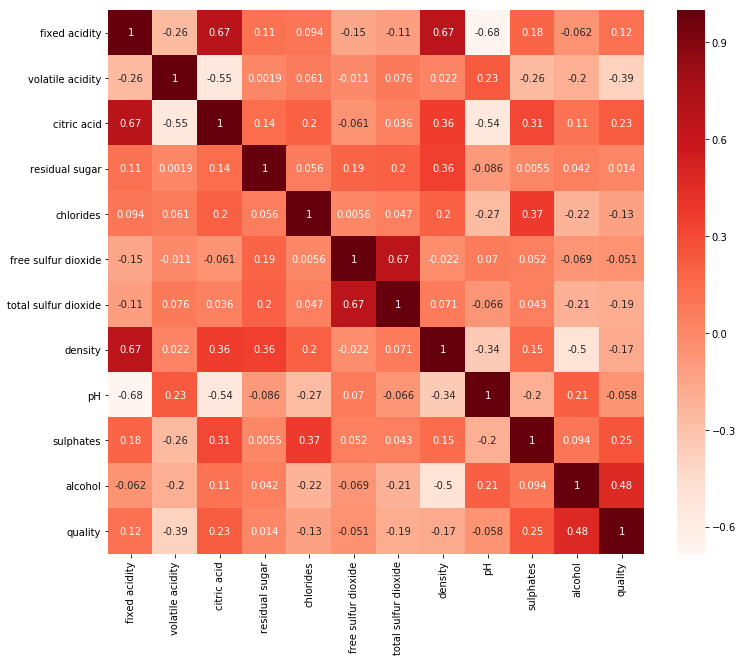

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcorr,cmap="Reds",annot=True)

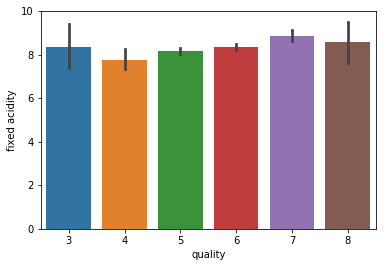

In [12]:
sns.barplot(df['quality'],df['fixed acidity'])

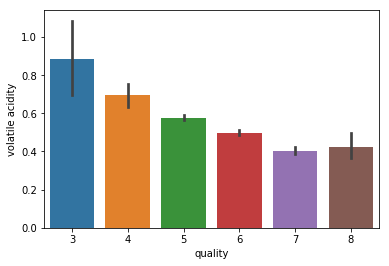

In [14]:
sns.barplot(df['quality'],df['volatile acidity'])

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

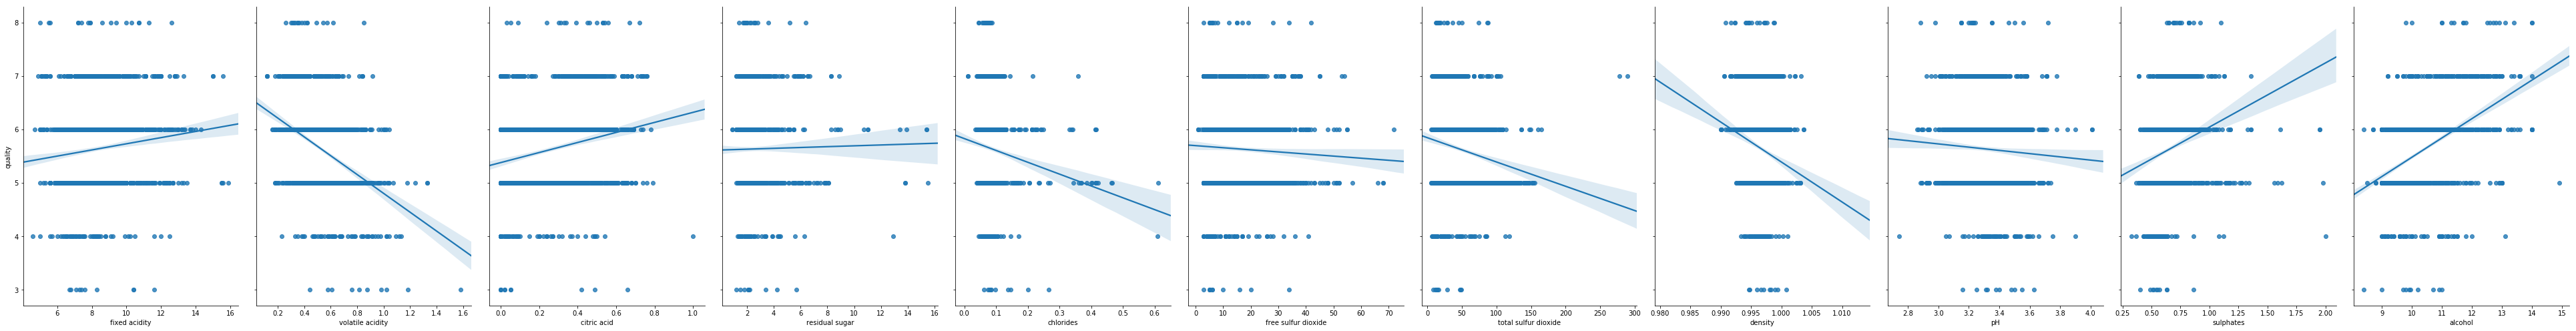

In [18]:
sns.pairplot(df,x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],y_vars='quality',height=7,aspect=.7,kind="reg")

In [23]:
df.drop("volatile acidity",axis=1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


#as we can see volatile acidity,chlorides, total sulfur dioxide and density effects a lot, but we will remove volatile acidity as it's impact is higher than any other

In [24]:
z=np.abs(zscore(df))
threshold=3
df_new = df[(z<3).all(axis=1)]

In [25]:
df.shape

(1599, 12)

In [26]:
df_new.shape

(1451, 12)

In [31]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=.33)

In [29]:
pipeline=make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=100))

In [30]:
hyperparameters = {'randomforestregressor__max_features':["auto","sqrt","log2"],"randomforestregressor__max_depth":[None,5,3,1]}

In [33]:
clf=GridSearchCV(pipeline,hyperparameters,cv=10)

In [44]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...ors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print(clf.refit)

True


In [46]:
pred=clf.predict(x_test)

In [47]:
r2_score(y_test,pred)

0.5201175391764983

In [48]:
mean_squared_error(y_test,pred)

0.30243924843423803

In [49]:
from sklearn.externals import joblib

In [50]:
joblib.dump(clf,"rf_reg.pkl")

['rf_reg.pkl']

In [52]:
clf2=joblib.load("rf_reg.pkl")

In [53]:
clf2.predict(x_test)

array([5.76, 6.67, 5.27, 5.1 , 5.42, 5.43, 5.53, 5.95, 5.66, 5.41, 5.33,
       5.78, 5.23, 6.04, 5.16, 5.98, 5.79, 5.26, 5.27, 5.14, 5.13, 5.02,
       6.34, 5.06, 5.11, 5.79, 5.1 , 6.91, 5.56, 5.27, 5.87, 5.93, 5.14,
       5.17, 5.32, 5.7 , 5.27, 6.36, 5.02, 6.07, 5.3 , 5.21, 5.09, 5.37,
       5.09, 5.1 , 5.36, 6.39, 5.79, 5.98, 6.07, 5.58, 5.92, 4.94, 5.38,
       5.2 , 5.53, 6.16, 5.56, 5.36, 6.33, 6.67, 5.91, 5.84, 5.29, 5.42,
       5.86, 5.52, 6.21, 5.94, 5.91, 5.65, 5.8 , 6.99, 5.13, 5.12, 5.37,
       5.04, 6.23, 6.8 , 5.99, 6.23, 5.08, 5.32, 5.27, 5.3 , 5.53, 6.39,
       5.48, 5.31, 5.94, 5.76, 5.83, 5.57, 7.36, 5.06, 6.05, 5.44, 5.7 ,
       6.34, 5.21, 5.26, 5.86, 5.73, 5.14, 5.42, 5.55, 5.82, 5.88, 5.18,
       6.29, 5.91, 5.34, 5.38, 6.01, 5.06, 5.8 , 6.2 , 6.39, 5.09, 6.67,
       5.58, 5.26, 5.15, 5.74, 6.51, 6.16, 5.69, 5.31, 5.08, 5.84, 5.73,
       5.14, 5.54, 5.08, 5.08, 5.44, 5.04, 5.56, 5.35, 5.82, 5.78, 5.09,
       5.88, 6.26, 5.01, 5.71, 5.35, 5.49, 6.3 , 5.